In [1]:
import numpy as np
from numpy import pi as π
from numpy.random import randn, seed
from numpy.linalg import norm
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

np.random.seed(42)

In [2]:
# Training and testing set sizes
n1 = 100 # Train
n2 = 50  # Test
n = n1 + n2

# Random ellipse 1 centered at (0, 0)
x, y = randn(n), 0.5*randn(n)

# Random ellipse 2 centered at (1, -2)
x2, y2 = randn(n) + 2, 0.2*randn(n) - 2

# Rotate ellipse 2 by theta
θ = π/4
A = np.array([
    [np.cos(θ), -np.sin(θ)],
    [np.sin(θ),  np.cos(θ)]
])

x3 = A[0, 0]*x2 + A[0, 1]*y2
y3 = A[1, 0]*x2 + A[1, 1]*y2

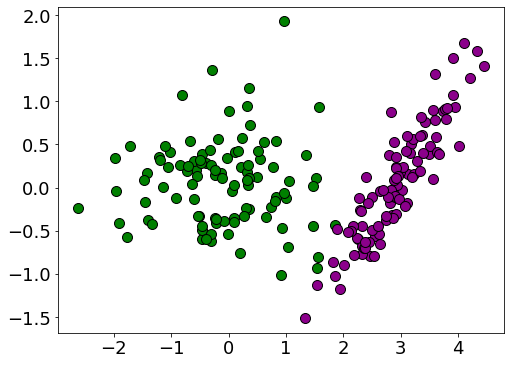

In [3]:
# Figure 5.12

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x[:n1], y[:n1], 'o', color='green', markeredgecolor='black', markersize=10)
ax.plot(x3[:n1], y3[:n1], 'o', color='darkmagenta', markeredgecolor='black', markersize=10);

In [4]:
# Training set: first 100 of 150 points
X1 = np.column_stack([x3[:n1], y3[:n1]])
X2 = np.column_stack([x[:n1], y[:n1]])

Y = np.vstack([
    X1,
    X2
])
Z = np.column_stack([np.ones(n1), np.full(n1, 2)])

# Test set: remaining 40 points
x1test = np.column_stack([x3[n1:], y3[n1:]])
x2test = np.column_stack([x[n1:], y[n1:]])

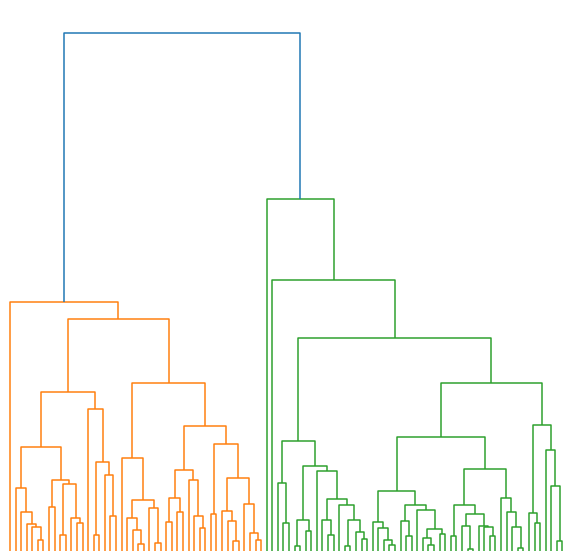

In [5]:
# Fig 5.14

Y3 = np.vstack([
    X1[:50, :],
    X2[:50, :]
])

Y2 = pdist(Y3, metric='euclidean')
Z = hierarchy.linkage(Y2, method='average')

fig, ax = plt.subplots(figsize=(10,  10))
dn = hierarchy.dendrogram(Z, ax=ax, p=100, color_threshold=0.85*np.max(Z[:, 2]))
ax.axis(False);

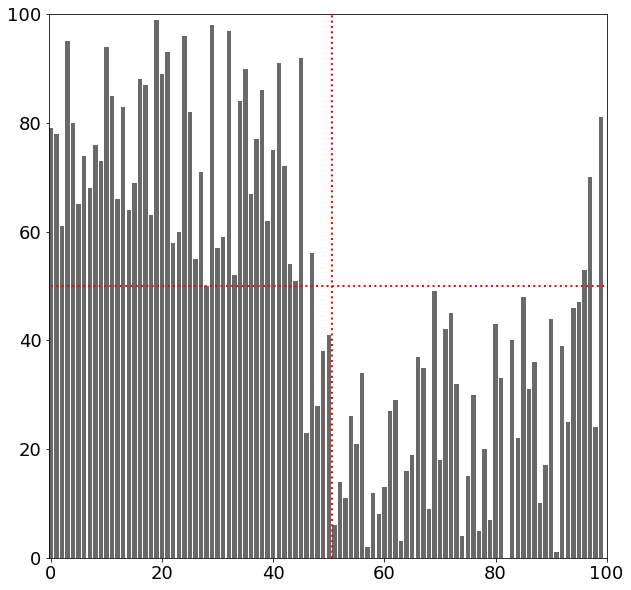

In [6]:
# Figure 5.15

fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(range(len(dn['leaves'])), dn['leaves'], color='dimgrey')
ax.plot([0, 100], [50, 50], ':', color='red', linewidth=2)
ax.plot([50.5, 50.5], [0, 100], ':', color='red', linewidth=2)
ax.margins(x=0, y=0);

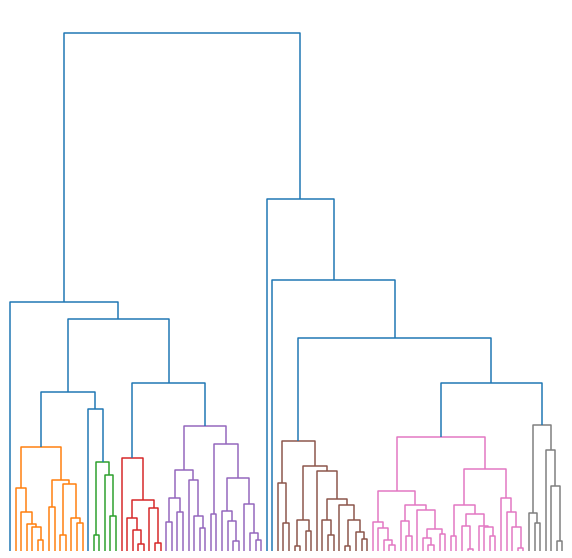

In [7]:
# Figure 5.16

fig, ax = plt.subplots(figsize=(10,  10))
dn = hierarchy.dendrogram(Z, ax=ax, p=100, color_threshold=0.25*np.max(Z[:, 2]))
ax.axis(False);